In [2]:
"""


Import the given dataset and perform the following\n",
    "\n",
    "- Clean the dataset\n",
    "- Filter the required columns\n",
    "- Handle the duplicates\n",
    "- Perform Univariate, bivariate analysis\n",
    "- Plot the answers for the questions as charts,\n",
    "1) Top 10 locations of the fastest roller coaster\n",
    "2) Top 10 locations of the roller coaster according to the height


"""

'\n\n\nImport the given dataset and perform the following\n",\n    "\n",\n    "- Clean the dataset\n",\n    "- Filter the required columns\n",\n    "- Handle the duplicates\n",\n    "- Perform Univariate, bivariate analysis\n",\n    "- Plot the answers for the questions as charts,\n",\n    "1) Top 10 locations of the fastest roller coaster\n",\n    "2) Top 10 locations of the roller coaster according to the height\n\n\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a = pd.read_csv('coaster_db.csv')
a.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [5]:
a.shape

(1087, 56)

In [6]:
a.tail(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1077,Fønix (roller coaster),"2,969.2 ft (905.0 m)",59 mph (95 km/h),Fårup Sommerland,Under construction,NaN,Steel,Vekoma,120 cm (3 ft 11 in),Wildcat,...,59 mph,95 km/h,59.0,mph,59.0,131.2,ft,NaN,3,4.1
1078,Guardians of the Galaxy: Cosmic Rewind,"5,577.4 ft (1,700.0 m)",NaN,Epcot,Under construction,2022,Steel – Enclosed – Spinning,Vekoma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1079,Ice Breaker (roller coaster),"1,900 ft (580 m)",52 mph (84 km/h),SeaWorld Orlando,Under construction,February 2022,Steel – Launched,Premier Rides,NaN,Sky Rocket,...,52 mph,84 km/h,52.0,mph,52.0,93.0,ft,NaN,0,NaN
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,48[1] in (122 cm),I-Box Track,...,76 mph,122 km/h,76.0,mph,76.0,206.0,ft,NaN,2,NaN
1081,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",80.0 km/h (49.7 mph),Sea World,Under construction,Easter 2022,Wood,Martin & Vleminckx,NaN,NaN,...,80.0 km/h,49.7 mph,80.0,km/h,49.7,32.0,m,105.0,0,NaN
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,...,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [7]:
a.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [8]:
a.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [9]:
a.describe(include='all')

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
count,1087,953,937,1087,874,837,1087,1028,831,744,...,937,935,937.000000,937,937.000000,965.000000,965,171.000000,1087.000000,362.000000
unique,990,569,243,280,15,656,98,102,100,317,...,225,229,NaN,2,NaN,NaN,2,NaN,NaN,NaN
top,Batman: The Ride,935 ft (285 m),50 mph (80 km/h),Other,Operating,1972,Steel,Vekoma,48 in (122 cm),Custom,...,50 mph,80 km/h,NaN,mph,NaN,NaN,ft,NaN,NaN,NaN
freq,7,21,63,250,668,7,308,135,224,20,...,63,63,NaN,780,NaN,NaN,794,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.850374,NaN,48.617289,89.575171,NaN,101.996491,1.326587,3.824006
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.385518,NaN,16.678031,136.246444,NaN,67.329092,2.030854,0.989998
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000,NaN,5.000000,4.000000,NaN,13.100000,0.000000,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.000000,NaN,37.300000,44.000000,NaN,51.800000,0.000000,3.400000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.000000,NaN,49.700000,79.000000,NaN,91.200000,0.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.000000,NaN,58.000000,113.000000,NaN,131.200000,2.000000,4.500000


In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [11]:
a.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [12]:
df = a[['coaster_name',
        #'Length', 'Speed', 
        'Location', 'Status', 
        #'Opening date','Type', 
        'Manufacturer', 
        #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
        #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', #'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy

In [52]:
a['opening_date_clean']

0       1884-06-16 00:00:00
1       1895-01-01 00:00:00
2                   Unknown
3       1901-01-01 00:00:00
4       1901-01-01 00:00:00
               ...         
1082                Unknown
1083    2022-01-01 00:00:00
1084    2016-06-16 00:00:00
1085                Unknown
1086    2022-01-01 00:00:00
Name: opening_date_clean, Length: 1087, dtype: object

In [ ]:
a['opening_date_clean'] = pd.to_datetime(a['opening_date_clean'])

In [16]:
a.isna().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [45]:
a['speed_mph'].fillna(a['speed_mph'].mean(), inplace=True)
a['height_ft'].fillna(a['height_ft'].mean(), inplace=True) 
a['Gforce_clean'].fillna(a['Gforce_clean'].mean(), inplace=True)
a['opening_date_clean'].fillna ('Unknown', inplace=True)
a['Manufacturer'].fillna('Unknown', inplace=True) 
a['Status'].fillna ('Unknown', inplace=True)
a['latitude'].fillna(a['latitude'].mean(), inplace=True)
a['longitude'].fillna(a['longitude'].mean(), inplace=True)
a['Length'].fillna('Unknown', inplace=True)
a['Speed'].fillna('Unknown', inplace=True)
a['Opening date'].fillna('Unknown', inplace=True)
a['Height restriction'].fillna('Unknown', inplace=True)
a['Model'].fillna('Unknown', inplace=True)
a['Height'].fillna('Unknown', inplace=True)
a['Inversions'].fillna(a['Inversions'].mean(), inplace=True)
a['Lift/launch system'].fillna('Unknown', inplace=True)
a['Cost'].fillna('Unknown', inplace=True)
a['Trains'].fillna('Unknown', inplace=True)
a['Park section'].fillna('Unknown', inplace=True)
a['Duration'].fillna('Unknown', inplace=True)
a['Capacity'].fillna('Unknown', inplace=True)
a['G-force'].fillna('Unknown', inplace=True)
a['Designer'].fillna('Unknown', inplace=True)
a['Max vertical angle'].fillna('Unknown', inplace=True)
a['Drop'].fillna('Unknown', inplace=True)
a['Soft opening date'].fillna('Unknown', inplace=True)
a['Fast Lane available'].fillna('Unknown', inplace=True)
a['Replaced'].fillna('Unknown', inplace=True)

In [60]:
a.isna().sum()

coaster_name                     0
Length                           0
Speed                            0
Location                         0
Status                           0
Opening date                     0
Type                             0
Manufacturer                     0
Height restriction               0
Model                            0
Height                           0
Inversions                       0
Lift/launch system               0
Cost                             0
Trains                           0
Park section                     0
Duration                         0
Capacity                         0
G-force                          0
Designer                         0
Max vertical angle               0
Drop                             0
Soft opening date                0
Fast Lane available              0
Replaced                         0
Track layout                     0
Fastrack available               0
Soft opening date.1              0
Closing date        

In [57]:
a['Track layout'].fillna('Unknown', inplace=True)
a['Fastrack available'].fillna('Unknown', inplace=True)
a['Soft opening date.1'].fillna('Unknown', inplace=True)
a['Closing date'].fillna('Unknown', inplace=True)
a['Opened'].fillna('Unknown', inplace=True)
a['Replaced by'].fillna('Unknown', inplace=True)
a['Website'].fillna('Unknown', inplace=True)
a['Flash Pass Available'].fillna('Unknown', inplace=True)
a['Must transfer from wheelchair'].fillna('Unknown', inplace=True)
a['Theme'].fillna('Unknown', inplace=True)
a['Single rider line available'].fillna('Unknown', inplace=True)
a['Restraint Style'].fillna('Unknown', inplace=True)
a['Flash Pass available'].fillna('Unknown', inplace=True)
a['Acceleration'].fillna('Unknown', inplace=True)
a['Restraints'].fillna('Unknown', inplace=True)
a['Name'].fillna('Unknown', inplace=True)

In [59]:
a['speed1'].fillna('Unknown', inplace=True)
a['speed2'].fillna('Unknown', inplace=True)
a['speed1_unit'].fillna('Unknown', inplace=True)
a['height_unit'].fillna('Unknown', inplace=True)
a['speed1_value'].fillna(a['speed1_value'].mean(), inplace=True)
a['height_value'].fillna(a['height_value'].mean(), inplace=True)

In [61]:
a.duplicated().sum()
#rename

0

In [62]:
a.loc[a.duplicated()]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean


In [63]:
a.loc[a.duplicated('coaster_name')].head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,Unknown,Unknown,...,60 mph,97 km/h,60.000000,mph,60.000000,96.000000,ft,101.996491,0,4.000000
60,Derby Racer,Unknown,Unknown,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,Unknown,Unknown,...,Unknown,Unknown,53.850374,Unknown,48.617289,89.575171,Unknown,101.996491,0,3.824006
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,Unknown,Unknown,Out and Back roller coaster,...,50 mph,80 km/h,50.000000,mph,50.000000,77.000000,ft,101.996491,0,3.824006
167,Big Thunder Mountain Railroad,Unknown,35 mph (56 km/h),Other,Unknown,Unknown,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train,...,35 mph,56 km/h,35.000000,mph,35.000000,104.000000,ft,101.996491,0,3.824006
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,102 cm (3 ft 4 in),Unknown,...,64 km/h,40 mph,64.000000,km/h,39.800000,10.000000,m,32.800000,0,3.824006


In [64]:
a.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,Unknown,Unknown,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,101.996491,0,4.0
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,Unknown,Unknown,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,101.996491,0,4.0


In [65]:
a.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [67]:
~a.duplicated(subset=['coaster_name','Opening date'])

0      True
1      True
2      True
3      True
4      True
       ... 
985    True
986    True
987    True
988    True
989    True
Length: 990, dtype: bool

In [ ]:
a = a.loc[~a.duplicated(subset=['coaster_name','Location','Opening date'])].reset_index(drop=True).copy()

In [68]:
a['speed_mph'] = a['speed_mph'].round(2)

In [69]:
a.isna().sum()

coaster_name                     0
Length                           0
Speed                            0
Location                         0
Status                           0
Opening date                     0
Type                             0
Manufacturer                     0
Height restriction               0
Model                            0
Height                           0
Inversions                       0
Lift/launch system               0
Cost                             0
Trains                           0
Park section                     0
Duration                         0
Capacity                         0
G-force                          0
Designer                         0
Max vertical angle               0
Drop                             0
Soft opening date                0
Fast Lane available              0
Replaced                         0
Track layout                     0
Fastrack available               0
Soft opening date.1              0
Closing date        

In [38]:
a.duplicated(subset=['coaster_name','Opening date'])
a.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,46 in (117 cm),Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,52.5,0,2.9
1,Flip Flap Railway,600 ft (180 m),6 mph (9.7 km/h),Sea Lion Park,Removed,1895,Wood,Lina Beecher,46 in (117 cm),Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,52.5,1,12.0
2,Switchback Railway (Euclid Beach Park),600 ft (180 m),6 mph (9.7 km/h),"Cleveland, Ohio, United States",Closed,1895,Other,Lina Beecher,46 in (117 cm),Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,52.5,0,12.0
3,Loop the Loop (Coney Island),600 ft (180 m),6 mph (9.7 km/h),Other,Removed,1901,Steel,Edwin Prescott,46 in (117 cm),Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,52.5,1,12.0
4,Loop the Loop (Young's Pier),600 ft (180 m),6 mph (9.7 km/h),Other,Removed,1901,Steel,Edwin Prescott,46 in (117 cm),Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,52.5,1,12.0


In [47]:
a = a.loc[~a.duplicated(subset=['coaster_name','Opening date'])].reset_index(drop=True).copy()


In [71]:
a.query('coaster_name == "Loop the Loop (Coney Island)"').head().sum()

coaster_name                                          Loop the Loop (Coney Island)
Length                                                                     Unknown
Speed                                                                      Unknown
Location                                                                     Other
Status                                                                     Removed
Opening date                                                                  1901
Type                                                                         Steel
Manufacturer                                                        Edwin Prescott
Height restriction                                                         Unknown
Model                                                                      Unknown
Height                                                                     Unknown
Inversions                                                                     1.0
Lift

In [83]:
a.query('Manufacturer == "Edwin Prescott"')

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
3,Loop the Loop (Coney Island),600 ft (180 m),6 mph (9.7 km/h),Other,Removed,1901,Steel,Edwin Prescott,46 in (117 cm),Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,52.5,1,12.0


In [82]:
a.duplicated(subset=['coaster_name','Opening date'])

0       False
1       False
2       False
3       False
4       False
        ...  
1019    False
1020    False
1021    False
1022    False
1023    False
Length: 1024, dtype: bool

In [84]:
a.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1019    False
1020    False
1021    False
1022    False
1023    False
Length: 1024, dtype: bool

In [85]:
a['Opening date'].value_counts()

1999                11
2000                 9
1985                 9
1976                 8
1998                 8
                    ..
June 13, 1998        1
December 8, 1998     1
August 7, 1998       1
April 4, 1998        1
April 6, 2001        1
Name: Opening date, Length: 656, dtype: int64

Text(0, 0.5, 'Counts')

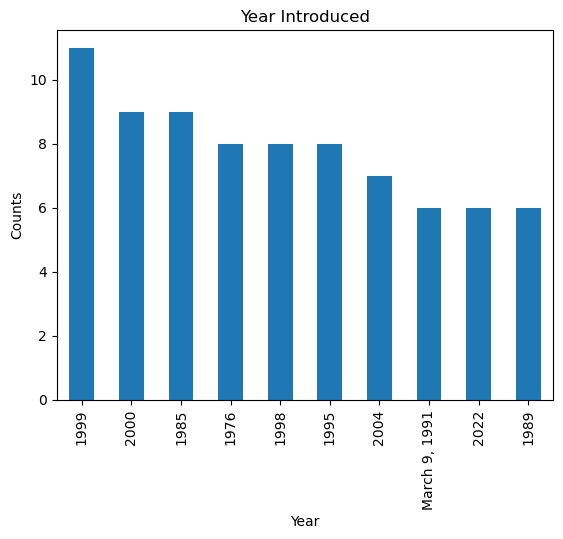

In [88]:
ax = a['Opening date'].value_counts().head(10).plot(kind='bar',title='Year Introduced')
ax.set_xlabel('Year')
ax.set_ylabel('Counts')


Text(0.5, 0, 'height_value\t')

C:\Users\Tejamani D R\ANC\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


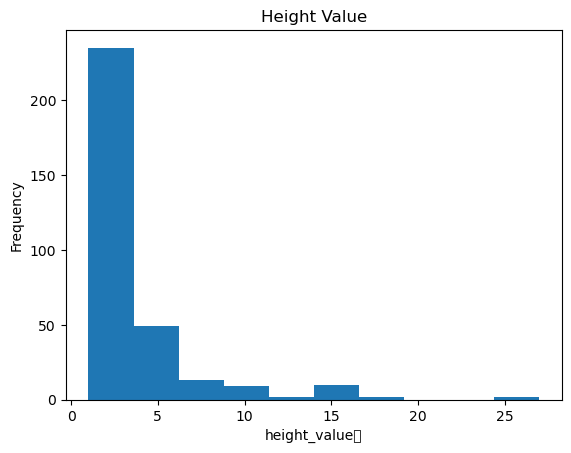

In [99]:

ax = a['height_value'].value_counts().plot(kind='hist',title='Height Value')
ax.set_xlabel('height_value	')

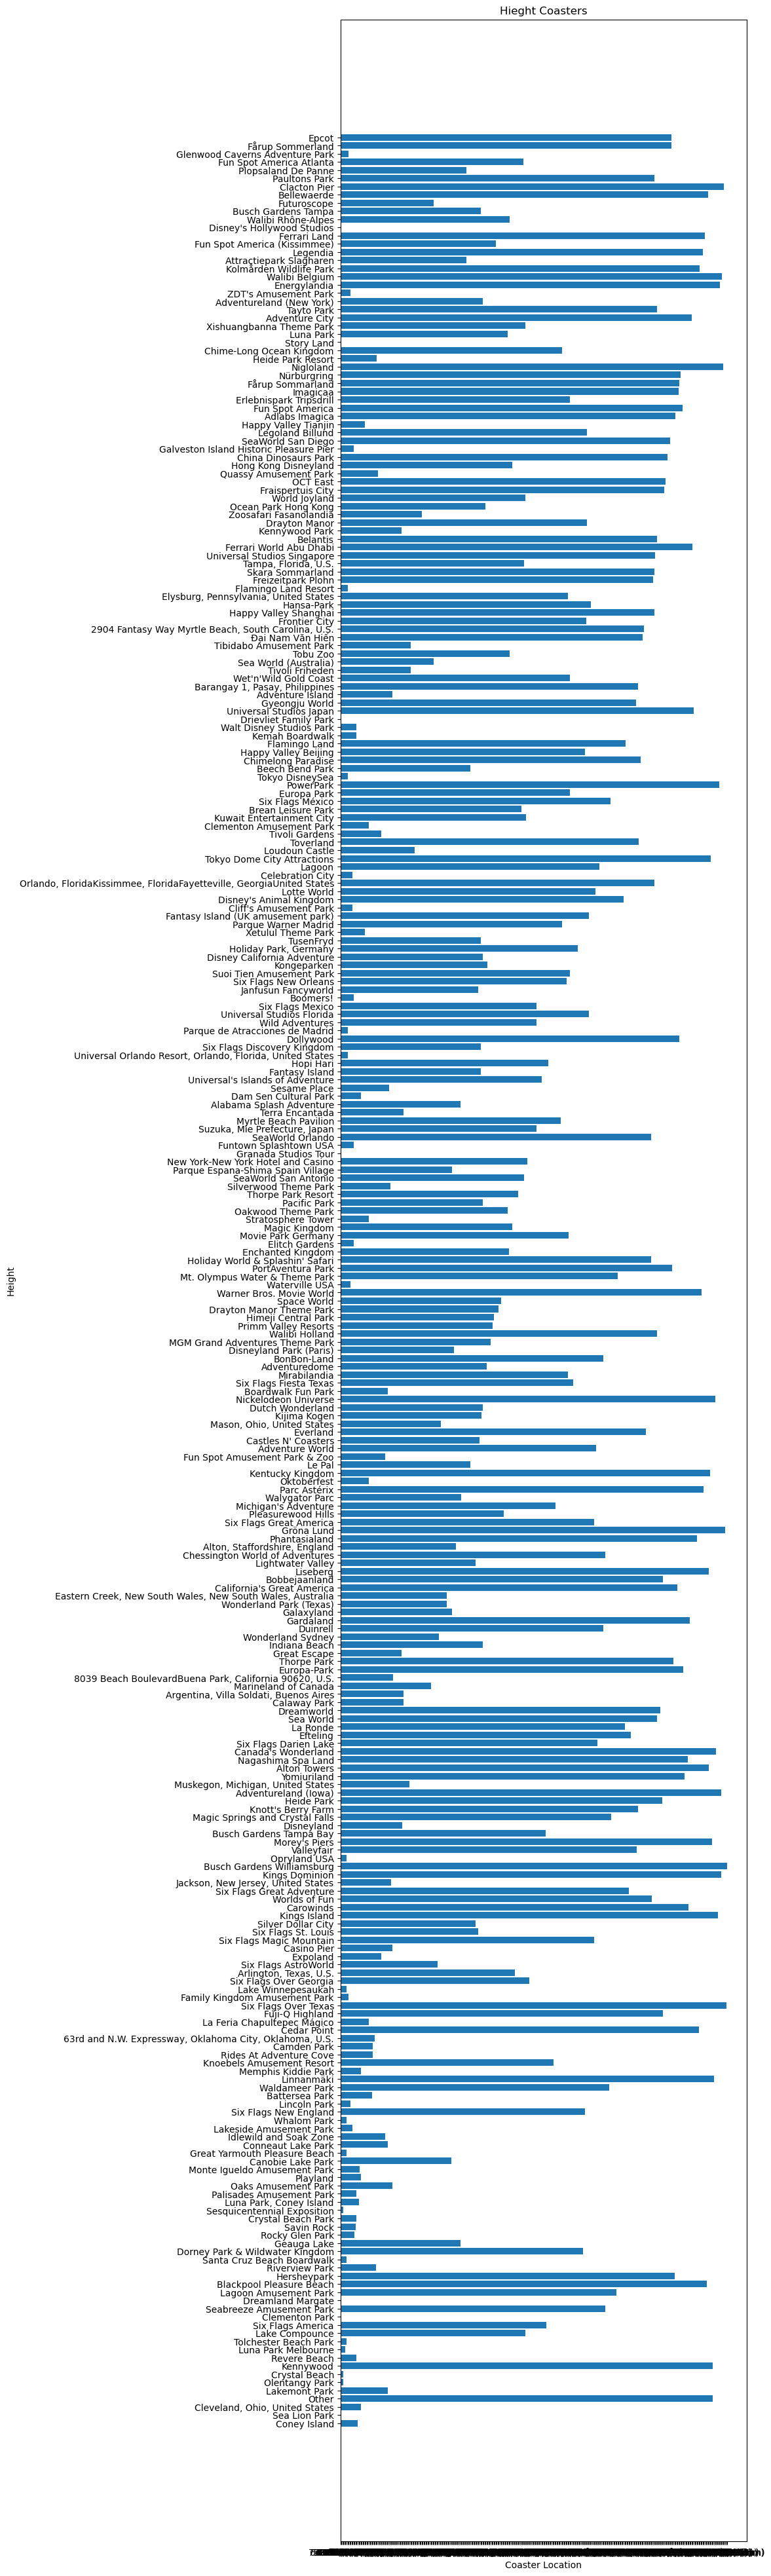

In [125]:
coasters = a['Location']
Height = a['Height']
plt.figure(figsize=(8,50))
plt.barh(coasters,Height)
plt.title('Hieght Coasters')
plt.xlabel('Coaster Location')
plt.ylabel('Height')
plt.show()

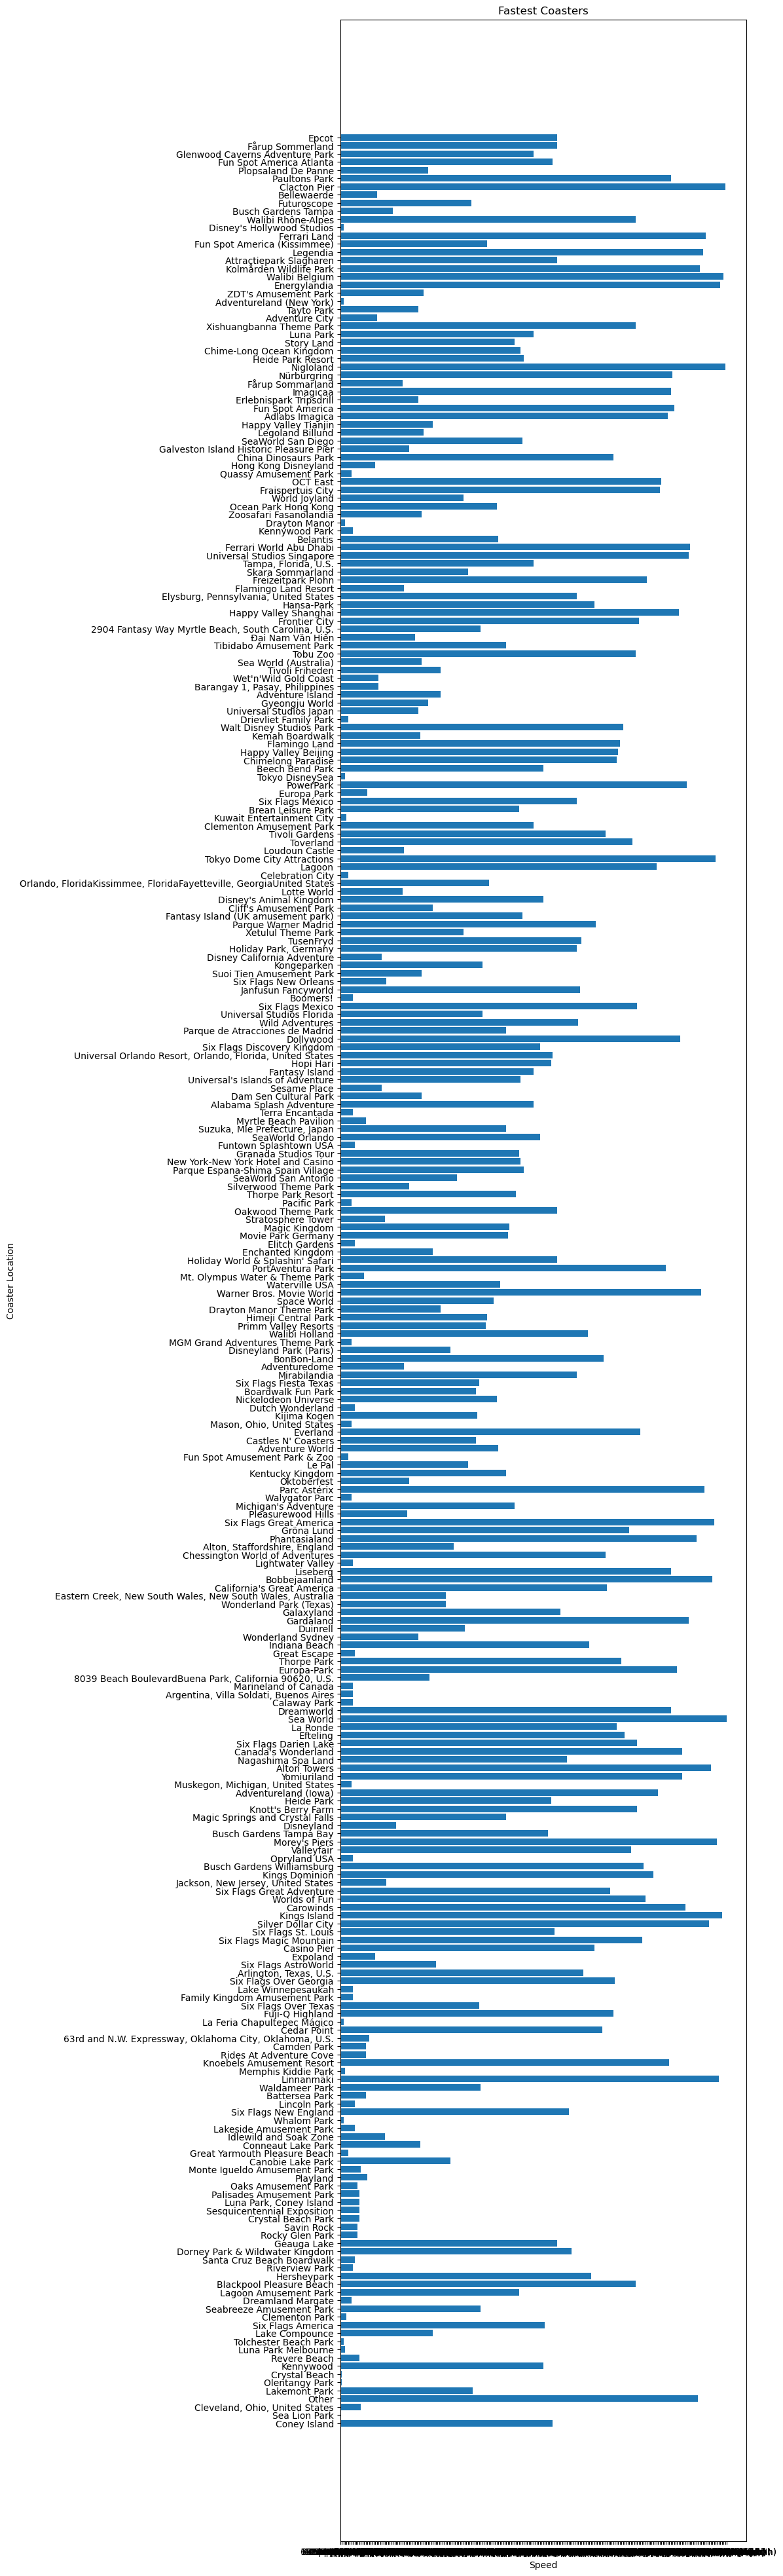

In [126]:
coasters = a['Location']
speed = a['Speed']
plt.figure(figsize=(8,50))
plt.barh(coasters,speed)
plt.title('Fastest Coasters')
plt.ylabel('Coaster Location')
plt.xlabel('Speed')
plt.show()